In [1]:
'''
    import section
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
    data exploration section
'''

In [2]:
# import csv file and display some rows
data = pd.read_csv('C:\\Users\\Saeth\\Downloads\\Data_Science_Task_22\\PreInterviewTaskData.csv')
data[:10]

,account,date,fraud,merchant
0,A0,2015-01-01,False,M98
1,A0,2015-01-01,False,M50
2,A0,2015-01-01,False,M55
3,A0,2015-01-01,False,M14
4,A0,2015-01-01,False,M10
5,A0,2015-01-01,False,M33
6,A0,2015-01-01,False,M82
7,A1,2015-01-01,False,M42
8,A1,2015-01-01,False,M98
9,A1,2015-01-01,False,M22


In [3]:
# see all 30 days
data['date'].unique()

array(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
       '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
       '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
       '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
       '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
       '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
       '2015-01-29', '2015-01-30'], dtype=object)

In [ ]:
# note
# date = string of year-month-day; year = 2015, month = 01, and day = [1,2,3,...,30]

In [4]:
# overall statistic of the dataset
data.describe()

,account,date,fraud,merchant
count,89851,89851,89851,89851
unique,1000,30,2,100
top,A831,2015-01-12,False,M8
freq,121,3081,88503,998


In [5]:
# find columns that contain null value
data.columns[data.isna().any()].tolist()

[]

In [ ]:
# note: no null values in the dataset

In [ ]:
'''
    data visulization section
'''

<AxesSubplot:title={'center':'Fraud = True plot'}, xlabel='Time', ylabel='Events'>

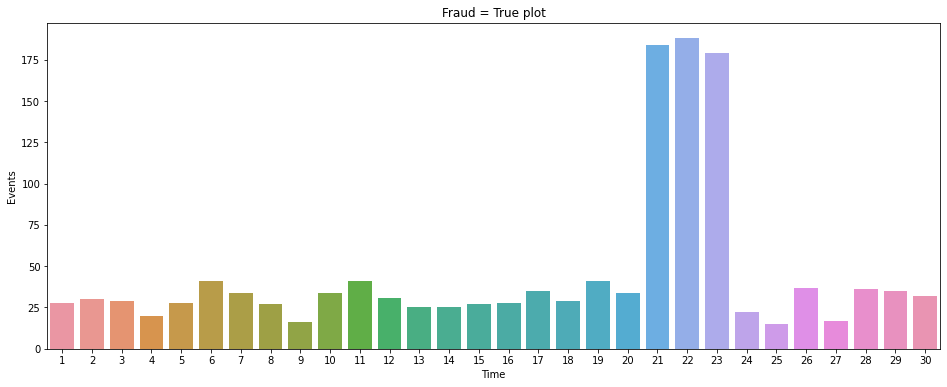

In [6]:
# plot fraud = True to see what days is the peak of the fraud

T = data[data['fraud'] == True]  # select rows that have fraud = True
T_rec = dict()  # a dictionary to record days and the fraudulent accounts on each day 
for i in range(1, 31):  # iterate days from 1 to 30
    # define the string of the day
    if i<10:
        g = '0' + str(i)  # add '0' in front of the day
    else:
        g = str(i)
    T_rec[i] = list(T[T['date'].isin(['2015-01-'+ g])]['account'])  # store key(day) and its value(fraudulent accounts)
keys = list(T_rec.keys())  # list of keys(days from 1 to 30)
vals = [len(T_rec[k]) for k in keys]  # frequency of the accounts in each day

# plot graph
plt.figure(figsize=(16,6))  # define figure size
plt.title("Fraud = True plot")  # define title
plt.xlabel("Time")  # define x label
plt.ylabel("Events")  # define y label
sns.barplot(x=keys, y=vals)  # bar plot

In [ ]:
# note
# 1. It can be clearly seen that days 21, 22, and 23 have the most frequency of the fraud.
# 2. So, the exploit period is most likely to happen in this time (21, 22, and 23)
#    compare to another period which are likely to be opportunistic fraud.

# Assumptoin: opportunistic fraud happends randomly each day campare to the common point of compromise fraud
#             which happends in the specific time frame.

In [7]:
# find the frequency of each fraudulent accounts in days 21, 22, and 23

T_account = dict()  # a dictionary to record fraudulent accounts and their frequency
for date in [21, 22, 23]:  # iterate date in 21, 22 and 23
    for account in T_rec[date]:  # for each fraudulent account in the selected date
        # store keys(accounts) and their values(frequency)
        if account not in T_account.keys():
            T_account[account] = 1
        else:
            T_account[account] += 1
# sort the T_account to see the result
sort = {k: v for k, v in sorted(T_account.items(), key=lambda item: item[1], reverse=True)}
sort

{'A425': 15,
 'A746': 15,
 'A781': 14,
 'A896': 14,
 'A841': 13,
 'A8': 11,
 'A154': 11,
 'A728': 11,
 'A817': 11,
 'A167': 10,
 'A299': 10,
 'A541': 10,
 'A556': 10,
 'A704': 10,
 'A802': 10,
 'A952': 10,
 'A111': 9,
 'A334': 9,
 'A355': 9,
 'A731': 9,
 'A787': 9,
 'A793': 9,
 'A825': 9,
 'A37': 8,
 'A203': 8,
 'A403': 8,
 'A420': 8,
 'A430': 8,
 'A551': 8,
 'A603': 8,
 'A645': 8,
 'A743': 8,
 'A837': 8,
 'A116': 7,
 'A119': 7,
 'A581': 7,
 'A648': 7,
 'A699': 7,
 'A991': 7,
 'A665': 7,
 'A809': 7,
 'A882': 7,
 'A40': 6,
 'A395': 6,
 'A434': 6,
 'A461': 6,
 'A907': 6,
 'A943': 6,
 'A951': 6,
 'A349': 5,
 'A701': 5,
 'A921': 5,
 'A336': 4,
 'A57': 2,
 'A157': 2,
 'A353': 2,
 'A381': 2,
 'A16': 1,
 'A32': 1,
 'A148': 1,
 'A250': 1,
 'A273': 1,
 'A283': 1,
 'A284': 1,
 'A391': 1,
 'A392': 1,
 'A397': 1,
 'A444': 1,
 'A458': 1,
 'A468': 1,
 'A480': 1,
 'A490': 1,
 'A494': 1,
 'A517': 1,
 'A615': 1,
 'A634': 1,
 'A697': 1,
 'A720': 1,
 'A723': 1,
 'A786': 1,
 'A836': 1,
 'A930': 1,
 'A973'

In [ ]:
# note
# 1. There are many low frequency fraudulent accounts.
# 2. We can make an assumption that the accounts with higher frequency than the average are the possible 
#    common point of compromise victims and not the opportunistic fraud.

In [8]:
# calculate the average of all frequency of fraudulent accounts in days 21, 22, 23
# and list all accounts that have higher frequency than the average

value = list(sort.values())  # list of all frequencies
avg = sum(value)/len(value)  # calculate the average value
print('average:', avg)
print('the possible common point of compromise victims:')
T_possible = {k: v for k, v in sorted(T_account.items(), key=lambda item: item[1], reverse=True) if v>avg}  # keep only the desired accounts
T_possible

average: 3.722972972972973
the possible common point of compromise victims:


{'A425': 15,
 'A746': 15,
 'A781': 14,
 'A896': 14,
 'A841': 13,
 'A8': 11,
 'A154': 11,
 'A728': 11,
 'A817': 11,
 'A167': 10,
 'A299': 10,
 'A541': 10,
 'A556': 10,
 'A704': 10,
 'A802': 10,
 'A952': 10,
 'A111': 9,
 'A334': 9,
 'A355': 9,
 'A731': 9,
 'A787': 9,
 'A793': 9,
 'A825': 9,
 'A37': 8,
 'A203': 8,
 'A403': 8,
 'A420': 8,
 'A430': 8,
 'A551': 8,
 'A603': 8,
 'A645': 8,
 'A743': 8,
 'A837': 8,
 'A116': 7,
 'A119': 7,
 'A581': 7,
 'A648': 7,
 'A699': 7,
 'A991': 7,
 'A665': 7,
 'A809': 7,
 'A882': 7,
 'A40': 6,
 'A395': 6,
 'A434': 6,
 'A461': 6,
 'A907': 6,
 'A943': 6,
 'A951': 6,
 'A349': 5,
 'A701': 5,
 'A921': 5,
 'A336': 4}

<AxesSubplot:xlabel='count', ylabel='merchant'>

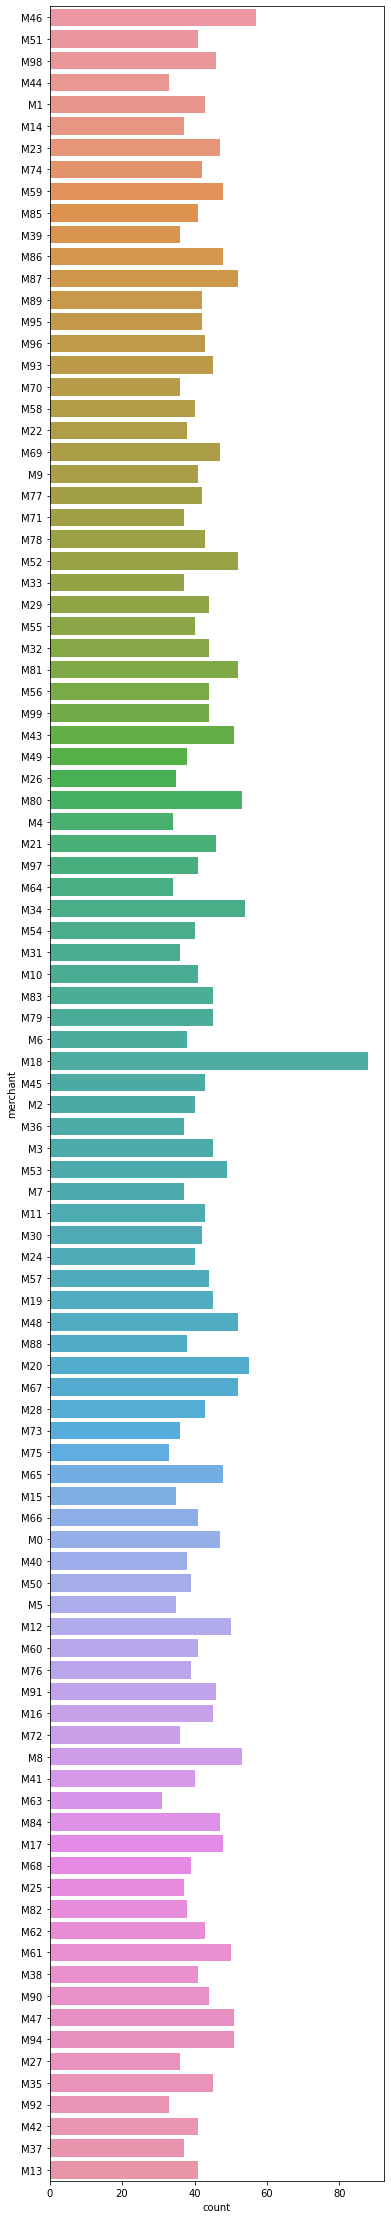

In [9]:
# plot all merchants that possible common point of compromise victims used before

F = data[data['fraud'] == False]  # all fraud = False data
F_account = F[F['account'].isin(list(T_possible.keys()))]  # all accounts is in possible common point of compromise victims data
plt.figure(figsize=(6,40))  # define figure size
sns.countplot(y = 'merchant',data=F_account)  # count plot

In [ ]:
# note
# 1. It can be clearly seen that M18 has the hightest transaction of possible common point of compromise victims.
# 2. So, it is likely that M18 is the common point of compromise.

<AxesSubplot:xlabel='count', ylabel='date'>

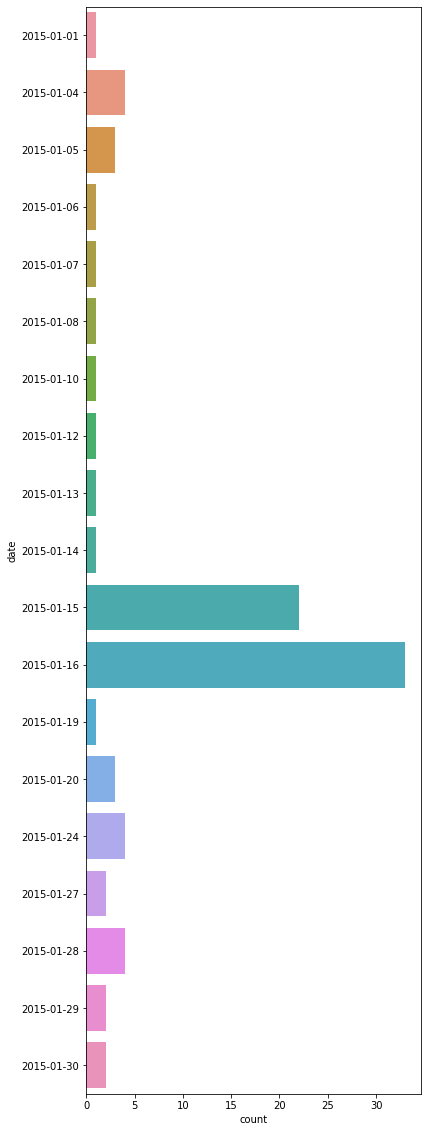

In [10]:
# In M18, find what days is the possible harvest days

M18 = F[F['merchant'] == 'M18']  # select rows from F that have M18 in merchant column
M18_account = M18[M18['account'].isin(list(T_possible.keys()))]  # choose only accounts in the T_possible.keys()
plt.figure(figsize=(6,20))  # define figure size
sns.countplot(y = 'date',data = M18_account)  # count plot

In [15]:
# find the common point of compromise victims in days 15, and 16 (in M18 merchant)
M18_account[M18_account['date'].isin(['2015-01-15','2015-01-16'])]['account'].unique()

array(['A37', 'A111', 'A299', 'A334', 'A336', 'A349', 'A355', 'A403',
       'A425', 'A430', 'A434', 'A461', 'A551', 'A603', 'A728', 'A731',
       'A743', 'A809', 'A825', 'A896', 'A951', 'A8', 'A40', 'A116',
       'A119', 'A154', 'A167', 'A203', 'A395', 'A420', 'A541', 'A556',
       'A581', 'A645', 'A648', 'A665', 'A699', 'A701', 'A704', 'A746',
       'A787', 'A793', 'A802', 'A817', 'A837', 'A841', 'A882', 'A907',
       'A921', 'A943', 'A952', 'A991'], dtype=object)

In [16]:
# the number of common point of the compromise victims in days 15, and 16 (in M18 merchant)
len(list(M18_account[M18_account['date'].isin(['2015-01-15','2015-01-16'])]['account'].unique()))

52

In [ ]:
# note
# 1. It is likely that days 15 and 16 are the most possible harvest days sine they have high frequency
#    of transactoin of the possible common point of compromise victims and high number of those accounts.
# 2. Also the duratoin of day 16 (harvest) and day 21 (exploit) is considered several days (4 days)
#    which is the definition of the duratoin between the harvest and exploit process.

In [ ]:
'''
    conclusion section
'''

In [ ]:
# From the above description,

# 1. The common point of compromise: M18.
# 2. Days accounts are compromised (harvest): 2015-01-15 and 2015-01-16.
# 3. Days the compromise is exploited: 2015-01-21, 2015-01-22, and 2015-01-23

# How well did your solution work and how do you know?
# The answer of this is based on statistics.
# 1. Days 21, 22 and 23 have high number of fraud (around 175) compared to the rest (around 25).
#    So, those days are likely to be the exploit process.
# 2. Assuming that we know all common point of compromise victims (accounts), those accounts have been heavily transaced in M18 (around 90)
#    compared to the rest merchants (around 40). So, M18 is likely to be the common point of compromise.
# 3. In M18, days 15 and 16 are likely to be the harvest process since it have high intensity of transaction (around 20 and 30 respectively),
#    compared to the rest (less than 5). Additionally, the number of harvested accounts in those days are high (52 accounts)